<a href="https://colab.research.google.com/github/carolinilaila/quarentena_dados/blob/master/QuarentenaDadosAula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
# importando dados direto do GitHub do Professor e definindo nome de variáveis para cada tabela
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [66]:
# Trocando nome das colunas

filmes.columns = ["filmeId", "titulo", "genero"]
avaliacoes.columns = ["usuarioId", "filmeId", "nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [67]:
# Criando um dataframe com o valor da nota(média) e agrupando na tabela avaliações 

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [68]:
# DESAFIO 1 - quais filmes não tiveram nota(média)

filmes_com_media.columns = ["filmeId", "titulo", "genero", "media"]
filmes_com_media.sort_values("media",ascending=False)
sem_nota = filmes_com_media[filmes_com_media.isna().any(axis=1)]
sem_nota.head(None)

,filmeId,titulo,genero,media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [69]:
# DESAFIO 2 - trocar o nome da coluna "nota" para "media" após o join

filmes_com_media.columns = ["filmeId", "titulo", "genero", "media"]
filmes_com_media.head()

,filmeId,titulo,genero,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [70]:
# DESAFIO 3 - quantas avaliações cada filme teve

votos_por_filme = avaliacoes.groupby('filmeId').size()
votos_por_filme.name = 'total_votos'
filmes_com_media_votos = filmes_com_media.join(votos_por_filme, on='filmeId')
filmes_com_media_votos

,filmeId,titulo,genero,media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


In [71]:
# DESAFIO 4 - arredondar valores de media para 2 casas decimais

filmes_com_media.round({'media': 2})

,filmeId,titulo,genero,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


In [72]:
# DESAFIO 5 - Descobrir todos os gêneros (créditos à Carol Oliveira)

generos_sep = filmes.genero.str.split('|', expand = True).stack()
generos_sep

0     0    Adventure
      1    Animation
      2     Children
      3       Comedy
      4      Fantasy
             ...    
9738  2      Fantasy
9739  0        Drama
9740  0       Action
      1    Animation
9741  0       Comedy
Length: 22084, dtype: object

In [73]:
# DESAFIO 6 - Quantos votos cada gênero teve

genero_votos = filmes["genero"].str.get_dummies(sep='|').sum()
genero_votos

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

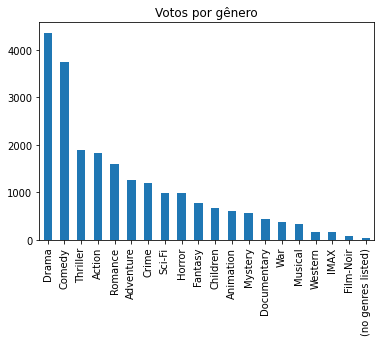

In [74]:
# DESAFIO 7 - Quantidade de filmes por gênero em gráfico (créditos ao Gustavo Martinho)

genero_grf = genero_votos.sort_values(ascending=False)
genero_grf.plot(kind="bar", title="Votos por gênero")

In [64]:
# DESAFIO CAROL - mostrar #top10 filmes mais votados

top10 = filmes_com_media_votos.sort_values("total_votos",ascending=False)
top10.head(10)

,filmeId,titulo,genero,media,total_votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0
